In [32]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sb
import yfinance as yf  
sb.set_theme()  

In [13]:
DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())

In [ ]:
class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()  

In [15]:
    def get_data(self):
        df = yf.download(self.symbol, start=self.start, end=self.end)
        df.index = pd.to_datetime(df.index)
        df = df[['Close']].copy()
        df.rename(columns={'Close': 'close'}, inplace=True)

        self.calc_returns(df)  
        return df

In [34]:
def main():
    test = Stock("AAPL")
    print(test.data.head())  

if __name__ == '__main__':
    main()


/var/folders/st/gkfrd35j0b772pxrp29p97cc0000gn/T/ipykernel_25748/3855150507.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.symbol, start=self.start, end=self.end)
[*********************100%***********************]  1 of 1 completed

Price            close  change instant_return
Ticker            AAPL                       
Date                                         
2024-10-07  220.663055     NaN            NaN
2024-10-08  224.724136  4.0611         0.0182
2024-10-09  228.476685  3.7525         0.0166
2024-10-10  227.978973 -0.4977        -0.0022
2024-10-11  226.495895 -1.4831        -0.0065


In [20]:
    def calc_returns(self, df):
        df['change'] = df['close'].diff().round(4)
        df['instant_return'] = np.log(df['close']).diff().round(4)


In [22]:
    def plot_return_dist(self):
        plt.figure(figsize=(10, 6))
        sb.histplot(self.data['instant_return'].dropna(), bins=50, kde=True)
        plt.title(f'{self.symbol} Instantaneous Return Distribution')
        plt.xlabel('Instantaneous Return')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()


In [24]:
def main():
    test = Stock("AAPL")
    print(test.data.head())
    test.plot_return_dist()


In [26]:
    def plot_performance(self):
        plt.figure(figsize=(10, 6))
        perf = self.data['close'] / self.data['close'].iloc[0] - 1
        plt.plot(perf.index, perf, label=self.symbol)
        plt.title(f'{self.symbol} Performance Over Time')
        plt.ylabel('Performance (%)')
        plt.xlabel('Date')
        plt.legend()
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        plt.grid(True)
        plt.show()


/var/folders/st/gkfrd35j0b772pxrp29p97cc0000gn/T/ipykernel_25748/3855150507.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.symbol, start=self.start, end=self.end)
[*********************100%***********************]  1 of 1 completed

Price            close  change instant_return
Ticker            AAPL                       
Date                                         
2024-10-07  220.663055     NaN            NaN
2024-10-08  224.724136  4.0611         0.0182
2024-10-09  228.476685  3.7525         0.0166
2024-10-10  227.978973 -0.4977        -0.0022
2024-10-11  226.495895 -1.4831        -0.0065


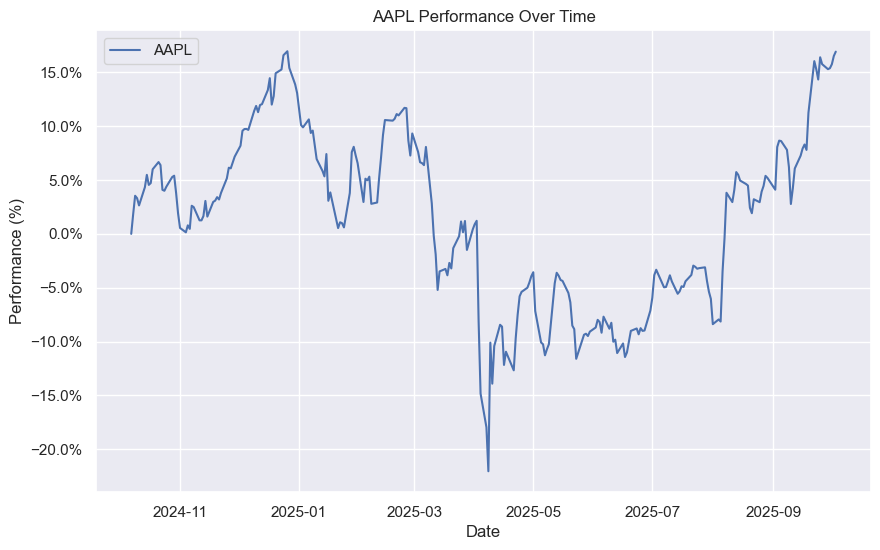

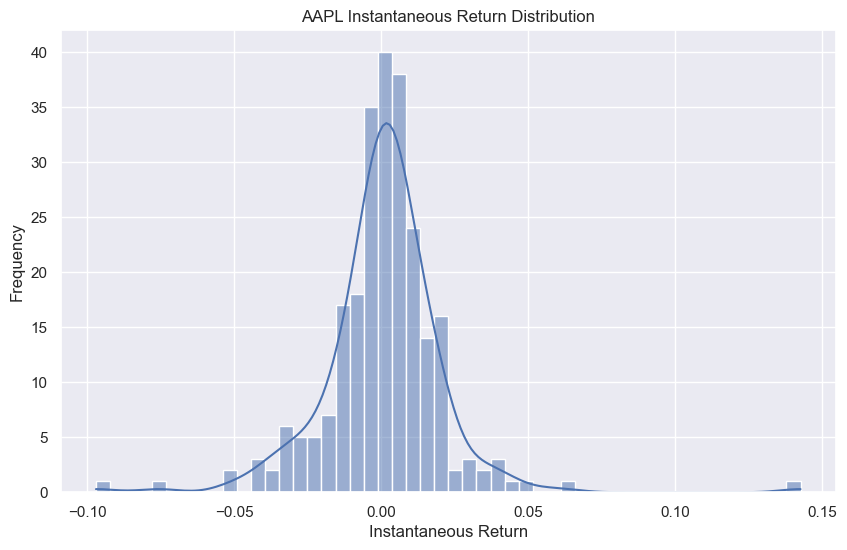

In [30]:
def main():
    test = Stock("AAPL")
    print(test.data.head())
    test.plot_performance()
    test.plot_return_dist()

if __name__ == '__main__':
    main()